In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import xgboost as xgb

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, sep = ';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [3]:
X = data.iloc[:,:11]
X.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
y = data.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [11]:
%%time
clf = DecisionTreeClassifier(random_state=42)
acc = cross_val_score(clf, X_train, y_train, scoring='accuracy')
acc.mean()

CPU times: user 63.6 ms, sys: 3.54 ms, total: 67.2 ms
Wall time: 73.9 ms


0.5898062139654068

In [12]:
%%time
clf = BaggingClassifier(n_estimators=100, random_state=42)
acc = cross_val_score(clf, X_train, y_train,  scoring='accuracy')
acc.mean()

CPU times: user 2.23 s, sys: 42.9 ms, total: 2.28 s
Wall time: 2.34 s


0.6711883408071749

In [13]:
%%time
clf = RandomForestClassifier(n_estimators=100, random_state=42)
acc = cross_val_score(clf, X_train, y_train, scoring='accuracy')
acc.mean()

CPU times: user 1.13 s, sys: 23.8 ms, total: 1.16 s
Wall time: 1.2 s


0.6783432094811019

Вывод: 1. Ансамбли деревьев справляются лучше чем одно дерево. 2. Для этого требуется больше времени. 3. Случайный лес отработал лучше чем Бэггинг

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [14]:
%%time
n_estim = [10, 50, 100] + list(np.arange(200, 5001, 200))

CPU times: user 30 µs, sys: 12 µs, total: 42 µs
Wall time: 34.8 µs


In [15]:
%%time
accuracy = []
for n in n_estim:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test, y_test))

CPU times: user 2min 41s, sys: 3.69 s, total: 2min 45s
Wall time: 2min 52s


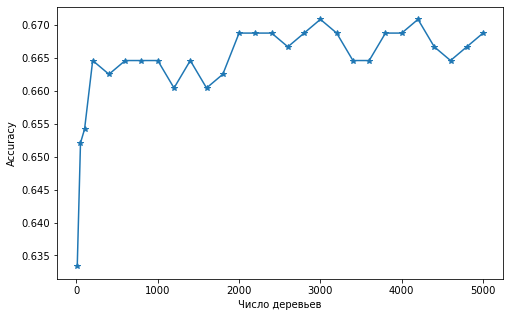

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(n_estim, accuracy, marker='*')
plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [17]:
y_train.unique()

array([7, 5, 6, 3, 8, 4])

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_ = le.fit_transform(y_train)
y_test_ = le.transform(y_test)

In [19]:
%%time
clf = GradientBoostingClassifier(random_state=42)
scores = cross_val_score(clf, X_train, y_train_, scoring='accuracy')
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.6435 accuracy with a standard deviation of 0.0369
CPU times: user 5.29 s, sys: 75.6 ms, total: 5.36 s
Wall time: 5.43 s


In [20]:
%%time
clf = xgb.XGBClassifier(random_state=42)
scores = cross_val_score(clf, X_train, y_train_, scoring='accuracy')
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.6435 accuracy with a standard deviation of 0.0303
CPU times: user 6.18 s, sys: 78.6 ms, total: 6.26 s
Wall time: 1.72 s


Таким образом, в заданных условиях алгоритмы xgboost и GradientBoostingClassifier показывают равное качество. Но xgboost быстрее.

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [21]:
import time
from sklearn.model_selection import GridSearchCV

In [22]:
parameters = {
    'learning_rate': np.arange(0.1,0.21,0.05),
    'n_estimators': np.arange(300,360,10), 
    'max_depth': np.arange(3,5,1)
}

In [23]:
%%time
alg = xgb.XGBClassifier(random_state=42)
clf_XGBC = GridSearchCV(alg, parameters, cv=3, n_jobs=-1, scoring='accuracy')
clf_XGBC.fit(X_train, y_train_)

CPU times: user 3.97 s, sys: 117 ms, total: 4.08 s
Wall time: 48.3 s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [24]:
print('XGBClassifier')
print('%0.4f accuracy with a standard deviation of %0.4f' % (clf_XGBC.best_score_, clf_XGBC.cv_results_['std_test_score'][clf_XGBC.best_index_]))
print('best params: %s' % clf_XGBC.best_params_)
print('mean fit time: %s' % clf_XGBC.cv_results_['mean_fit_time'][clf_XGBC.best_index_])

XGBClassifier
0.6506 accuracy with a standard deviation of 0.0313
best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 340}
mean fit time: 1.9295579592386882


In [27]:
%%time
alg = GradientBoostingClassifier(random_state=42)
clf_GBC = GridSearchCV(alg, parameters, cv=3, n_jobs=-1, scoring='accuracy')
clf_GBC.fit(X_train, y_train_)

CPU times: user 5.98 s, sys: 236 ms, total: 6.22 s
Wall time: 19min 5s


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14]),
                         'max_depth': array([3, 4]),
                         'n_estimators': array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400])},
             scoring='accuracy')

In [28]:
print('GradientBoostingClassifier')
print('%0.4f accuracy with a standard deviation of %0.4f' % (clf_GBC.best_score_, clf_GBC.cv_results_['std_test_score'][clf_GBC.best_index_]))
print('best params: %s' % clf_GBC.best_params_)
print('mean fit time: %s' % clf_GBC.cv_results_['mean_fit_time'][clf_GBC.best_index_])

GradientBoostingClassifier
0.6452 accuracy with a standard deviation of 0.0291
best params: {'learning_rate': 0.11000000000000001, 'max_depth': 4, 'n_estimators': 310}
mean fit time: 7.136683305104573


Таким образом XGBClassifier показывает лечше качество чем GradientBoostingClassifier при этом быстрее.

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [29]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [30]:
%%time
clf = LGBMClassifier(random_state=42)
scores = cross_val_score(clf, X_train, y_train_, scoring='accuracy')
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.6577 accuracy with a standard deviation of 0.0264
CPU times: user 6.9 s, sys: 152 ms, total: 7.05 s
Wall time: 2.16 s


In [31]:
%%time
clf = CatBoostClassifier(random_state=42, verbose=False)
scores = cross_val_score(clf, X_train, y_train_, scoring='accuracy')
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.6578 accuracy with a standard deviation of 0.0365
CPU times: user 40.9 s, sys: 1.49 s, total: 42.3 s
Wall time: 16.3 s


Таким образом, catboost и lightgbm показывают лучше качество по сравнению с sklearn и xgboost. При этом catboost самый медленный.

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [43]:
%%time
parameters = {
    'learning_rate': np.arange(0.1,0.15,0.01),
    'n_estimators': np.arange(100,210,10), 
    'max_depth': np.arange(1,5,1)
}
alg = LGBMClassifier(random_state=42)
clf_LGBMC = GridSearchCV(alg, parameters, cv=3, n_jobs=-1, scoring='accuracy')
clf_LGBMC.fit(X_train, y_train_)

CPU times: user 2.09 s, sys: 161 ms, total: 2.25 s
Wall time: 44.8 s


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': array([0.1 , 0.11, 0.12, 0.13, 0.14]),
                         'max_depth': array([1, 2, 3, 4]),
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])},
             scoring='accuracy')

In [44]:
print('LGBMClassifier')
print('%0.4f accuracy with a standard deviation of %0.4f' % (clf_LGBMC.best_score_, clf_LGBMC.cv_results_['std_test_score'][clf_LGBMC.best_index_]))
print('best params: %s' % clf_LGBMC.best_params_)
print('mean fit time: %s' % clf_LGBMC.cv_results_['mean_fit_time'][clf_LGBMC.best_index_])

LGBMClassifier
0.6282 accuracy with a standard deviation of 0.0142
best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
mean fit time: 0.49478697776794434


In [99]:
%%time
parameters = {
    'learning_rate': np.arange(0.1,0.6,0.1),
    'n_estimators': np.arange(100,1001,100), 
    'max_depth': np.arange(3,7,1)
}
alg = CatBoostClassifier(random_state=42, verbose=False)
clf_CBC = GridSearchCV(alg, parameters, cv=3, n_jobs=-1, scoring='accuracy')
clf_CBC.fit(X_train, y_train_)

CPU times: user 3.57 s, sys: 280 ms, total: 3.85 s
Wall time: 6min 14s


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ff37e022e80>,
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'max_depth': array([3, 4, 5, 6]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [100]:
print('CatBoostClassifier')
print('%0.4f accuracy with a standard deviation of %0.4f' % (clf_CBC.best_score_, clf_CBC.cv_results_['std_test_score'][clf_CBC.best_index_]))
print('best params: %s' % clf_CBC.best_params_)
print('mean fit time: %s' % clf_CBC.cv_results_['mean_fit_time'][clf_CBC.best_index_])

CatBoostClassifier
0.6443 accuracy with a standard deviation of 0.0249
best params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
mean fit time: 2.5181363423665366


Таким образом, по качеству:
1. XGBClassifier 0.6506 accuracy with a standard deviation of 0.0313
2. GradientBoostingClassifier 0.6452 accuracy with a standard deviation of 0.0291
3. CatBoostClassifier 0.6443 accuracy with a standard deviation of 0.0249
4. LGBMClassifier 0.6282 accuracy with a standard deviation of 0.0142

по скорости:
1. LGBMClassifier mean fit time: 0.49478697776794434
2. XGBClassifier mean fit time: 1.9295579592386882
3. CatBoostClassifier mean fit time: 2.5181363423665366
4. GradientBoostingClassifier mean fit time: 7.136683305104573



8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [79]:
import optuna
#from sklearn.metrics import accuracy_score
optuna.logging.set_verbosity(optuna.logging.WARNING)
#optuna.logging.set_verbosity(optuna.logging.DEBUG)

In [80]:
def objective(trial):

    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'n_jobs': -1,
        'random_state': 42
    }

    optuna_model = xgb.XGBClassifier(**params)
    scores = cross_val_score(optuna_model, X_train, y_train_, scoring='accuracy')

    #optuna_model.fit(X_train, y_train_)
    #y_pred = optuna_model.predict(X_test)
    #accuracy = accuracy_score(y_test_, y_pred)

    return scores.mean() #accuracy



study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

In [90]:
print('Best value:  %s' % study.best_value)
print('Best params: %s' % study.best_params)

Best value:  0.6676089045483665
Best params: {'learning_rate': 0.011981494274961172, 'n_estimators': 361, 'max_depth': 8}


Таким образом, optuna позволяет задавать непрерывные диапазоны параметров, показывает лучшее качество и быстродействие

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [91]:
from sklearn.ensemble import StackingClassifier

In [94]:
estimators = [
    ('GBC', GradientBoostingClassifier(random_state=42)),
    ('XGBC', xgb.XGBClassifier(random_state=42)),
    ('LGBMC', LGBMClassifier(random_state=42)),
    ('CBC', CatBoostClassifier(random_state=42, verbose=False))
]
clf = StackingClassifier(estimators=estimators)
scores = cross_val_score(clf, X_train, y_train_, scoring='accuracy')
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.6685 accuracy with a standard deviation of 0.0275


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [102]:
estimators = [
    ('GBC', GradientBoostingClassifier(**clf_GBC.best_params_, random_state=42)),
    ('XGBC', xgb.XGBClassifier(**clf_XGBC.best_params_, random_state=42)),
    ('LGBMC', LGBMClassifier(**clf_LGBMC.best_params_, random_state=42)),
    ('CBC', CatBoostClassifier(**clf_CBC.best_params_, random_state=42, verbose=False))
]
clf = StackingClassifier(estimators=estimators)
scores = cross_val_score(clf, X_train, y_train_, scoring='accuracy')
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.6739 accuracy with a standard deviation of 0.0279


Таким образом, стэкинг алгоритмов с оптимальными параметрами показывает лучший результат.